<span style="Algerian:cursive;font-size:50px;color:Purple;">Type of Infant Delivery Prediction

<span style="Algerian:cursive;font-size:25px;color:red;">Objective</span>

***1. To find which factors affects the Delivery Type.***

***2. To find a high performance predictive model that classifies the type of delivery.***


<span style="Algerian:cursive;font-size:25px;color:red;">Import Data</span>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\LENOVO\\Kalyani\\Documents\\Datasets\\Pregnancy_Data.csv")
data.head()

,Serial_Number,Mother_Name,Contact_Number,Mother_Age,Mother_education,Living_area,Family_Type,Members_in_the_family,Employed_family_members,Monthly_income,...,Child_order,Type_of_delivery,New_born_baby_sex,New_born_baby_Weight,Baby_Blood_group,Number_of_children,ANC_visits_during_pregnancy_period,Health_problems_during_pregnancy_period,Ultra_Sound_Examination,Any_abnormality_detected_during_USE
0,13748,Monali_Samadhan_Kale,8.329200e+09,22,HSC,Rural,Joint,7,1,10000_to_20000,...,2,Normal,Female,2.9,NaN,1,15,No,4,No
1,13873,Muskan_Anis_Kotwal,7.385908e+09,22,Undergraduate,Rural,Joint,12,4,10000_to_20000,...,1,Normal,Male,3.1,NaN,1,18,Yes,4,No
2,13976,Sonali_Prayag_Varpe,9.637010e+09,30,Post_Graduate,Urban,Joint,5,1,Greater_than_20000,...,1,Normal,Female,3.2,NaN,1,9,No,5,No
3,13919,Rani_Bablu_Pawra,9.022500e+09,22,Other,Rural,Joint,21,4,Greater_than_20000,...,2,Normal,Female,2.6,NaN,1,3,No,1,No
4,14000,Saleha_Imran_Patel,8.888043e+09,24,HSC,Rural,Joint,9,3,Greater_than_20000,...,2,Normal,Male,4.2,NaN,1,8,No,5,No


In [3]:
p=data[['Mother_Age','Mother_education','Living_area','Family_Type','Members_in_the_family','Monthly_income','Mother_Occupation','Working_Status','Father_Age','Marriage_years','Mother_Age_at_marriage','Number_of_earlier_pregnancies','Distance_from_home_to_ANC_center','Mother_HB','Mother_Sugar','Mother_Blood_Group','Mother_Weight_before_delivery','Pregnancy_period_till_the_delivery','Child_order','New_born_baby_sex','New_born_baby_Weight','ANC_visits_during_pregnancy_period','Health_problems_during_pregnancy_period','Ultra_Sound_Examination','Any_abnormality_detected_during_USE','Type_of_delivery']]
p.head()

,Mother_Age,Mother_education,Living_area,Family_Type,Members_in_the_family,Monthly_income,Mother_Occupation,Working_Status,Father_Age,Marriage_years,...,Mother_Weight_before_delivery,Pregnancy_period_till_the_delivery,Child_order,New_born_baby_sex,New_born_baby_Weight,ANC_visits_during_pregnancy_period,Health_problems_during_pregnancy_period,Ultra_Sound_Examination,Any_abnormality_detected_during_USE,Type_of_delivery
0,22,HSC,Rural,Joint,7,10000_to_20000,Housewife,Non-Working,24,4,...,47,279,2,Female,2.9,15,No,4,No,Normal
1,22,Undergraduate,Rural,Joint,12,10000_to_20000,Housewife,Non-Working,28,1,...,60,273,1,Male,3.1,18,Yes,4,No,Normal
2,30,Post_Graduate,Urban,Joint,5,Greater_than_20000,Housewife,Non-Working,37,6,...,75,268,1,Female,3.2,9,No,5,No,Normal
3,22,Other,Rural,Joint,21,Greater_than_20000,Housewife,Non-Working,24,3,...,45,228,2,Female,2.6,3,No,1,No,Normal
4,24,HSC,Rural,Joint,9,Greater_than_20000,Housewife,Non-Working,31,5,...,68,275,2,Male,4.2,8,No,5,No,Normal


In [4]:
p.shape

(201, 26)

In [5]:
p.size

5226

In [6]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Mother_Age                               201 non-null    int64  
 1   Mother_education                         201 non-null    object 
 2   Living_area                              201 non-null    object 
 3   Family_Type                              201 non-null    object 
 4   Members_in_the_family                    201 non-null    int64  
 5   Monthly_income                           201 non-null    object 
 6   Mother_Occupation                        201 non-null    object 
 7   Working_Status                           201 non-null    object 
 8   Father_Age                               201 non-null    int64  
 9   Marriage_years                           201 non-null    int64  
 10  Mother_Age_at_marriage                   201 non-n

In [7]:
p.describe()

,Mother_Age,Members_in_the_family,Father_Age,Marriage_years,Mother_Age_at_marriage,Distance_from_home_to_ANC_center,Mother_HB,Mother_Sugar,Mother_Weight_before_delivery,Pregnancy_period_till_the_delivery,Child_order,New_born_baby_Weight,ANC_visits_during_pregnancy_period,Ultra_Sound_Examination
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,22.885572,6.741294,27.935323,3.228856,19.636816,10.467164,11.412537,97.621095,55.676617,271.049751,1.781095,2.758308,10.696517,4.378109
std,3.749912,2.526408,4.157018,2.854359,3.312467,10.052110,1.308273,14.280740,10.377374,9.926606,0.872835,0.421525,4.592650,1.651157
min,18.000000,2.000000,19.000000,1.000000,10.000000,0.100000,7.100000,62.000000,30.000000,211.000000,1.000000,1.030000,2.000000,1.000000
25%,20.000000,5.000000,25.000000,1.000000,18.000000,3.000000,10.500000,90.000000,49.000000,268.000000,1.000000,2.500000,8.000000,3.000000
50%,22.000000,6.000000,27.000000,2.000000,19.000000,7.000000,11.500000,98.000000,55.000000,273.000000,2.000000,2.800000,10.000000,4.000000
75%,25.000000,8.000000,30.000000,4.000000,21.000000,15.000000,12.300000,103.000000,62.000000,278.000000,2.000000,3.000000,14.000000,5.000000
max,35.000000,21.000000,42.000000,21.000000,29.000000,50.000000,14.100000,180.000000,85.000000,295.000000,5.000000,4.200000,25.000000,12.000000


In [8]:
p.nunique()

Mother_Age                                 17
Mother_education                            9
Living_area                                 2
Family_Type                                 2
Members_in_the_family                      13
Monthly_income                              4
Mother_Occupation                           6
Working_Status                              2
Father_Age                                 22
Marriage_years                             14
Mother_Age_at_marriage                     17
Number_of_earlier_pregnancies               3
Distance_from_home_to_ANC_center           29
Mother_HB                                  54
Mother_Sugar                               59
Mother_Blood_Group                          7
Mother_Weight_before_delivery              47
Pregnancy_period_till_the_delivery         37
Child_order                                 5
New_born_baby_sex                           2
New_born_baby_Weight                       29
ANC_visits_during_pregnancy_period

<span style="Algerian:cursive;font-size:25px;color:red;"> Checking Missing Values & Duplicalted Values</span>

In [9]:
p.isnull().sum()

Mother_Age                                 0
Mother_education                           0
Living_area                                0
Family_Type                                0
Members_in_the_family                      0
Monthly_income                             0
Mother_Occupation                          0
Working_Status                             0
Father_Age                                 0
Marriage_years                             0
Mother_Age_at_marriage                     0
Number_of_earlier_pregnancies              0
Distance_from_home_to_ANC_center           0
Mother_HB                                  0
Mother_Sugar                               0
Mother_Blood_Group                         0
Mother_Weight_before_delivery              0
Pregnancy_period_till_the_delivery         0
Child_order                                0
New_born_baby_sex                          0
New_born_baby_Weight                       0
ANC_visits_during_pregnancy_period         0
Health_pro

In [10]:
p.duplicated().sum()

0

<span style="Algerian:cursive;font-size:25px;color:red;"> Finding & Removing Outliers</span>

Mother_Age                               AxesSubplot(0.125,0.653529;0.133621x0.226471)
Members_in_the_family                 AxesSubplot(0.285345,0.653529;0.133621x0.226471)
Father_Age                             AxesSubplot(0.44569,0.653529;0.133621x0.226471)
Marriage_years                        AxesSubplot(0.606034,0.653529;0.133621x0.226471)
Mother_Age_at_marriage                AxesSubplot(0.766379,0.653529;0.133621x0.226471)
Distance_from_home_to_ANC_center         AxesSubplot(0.125,0.381765;0.133621x0.226471)
Mother_HB                             AxesSubplot(0.285345,0.381765;0.133621x0.226471)
Mother_Sugar                           AxesSubplot(0.44569,0.381765;0.133621x0.226471)
Mother_Weight_before_delivery         AxesSubplot(0.606034,0.381765;0.133621x0.226471)
Pregnancy_period_till_the_delivery    AxesSubplot(0.766379,0.381765;0.133621x0.226471)
Child_order                                  AxesSubplot(0.125,0.11;0.133621x0.226471)
New_born_baby_Weight                      A

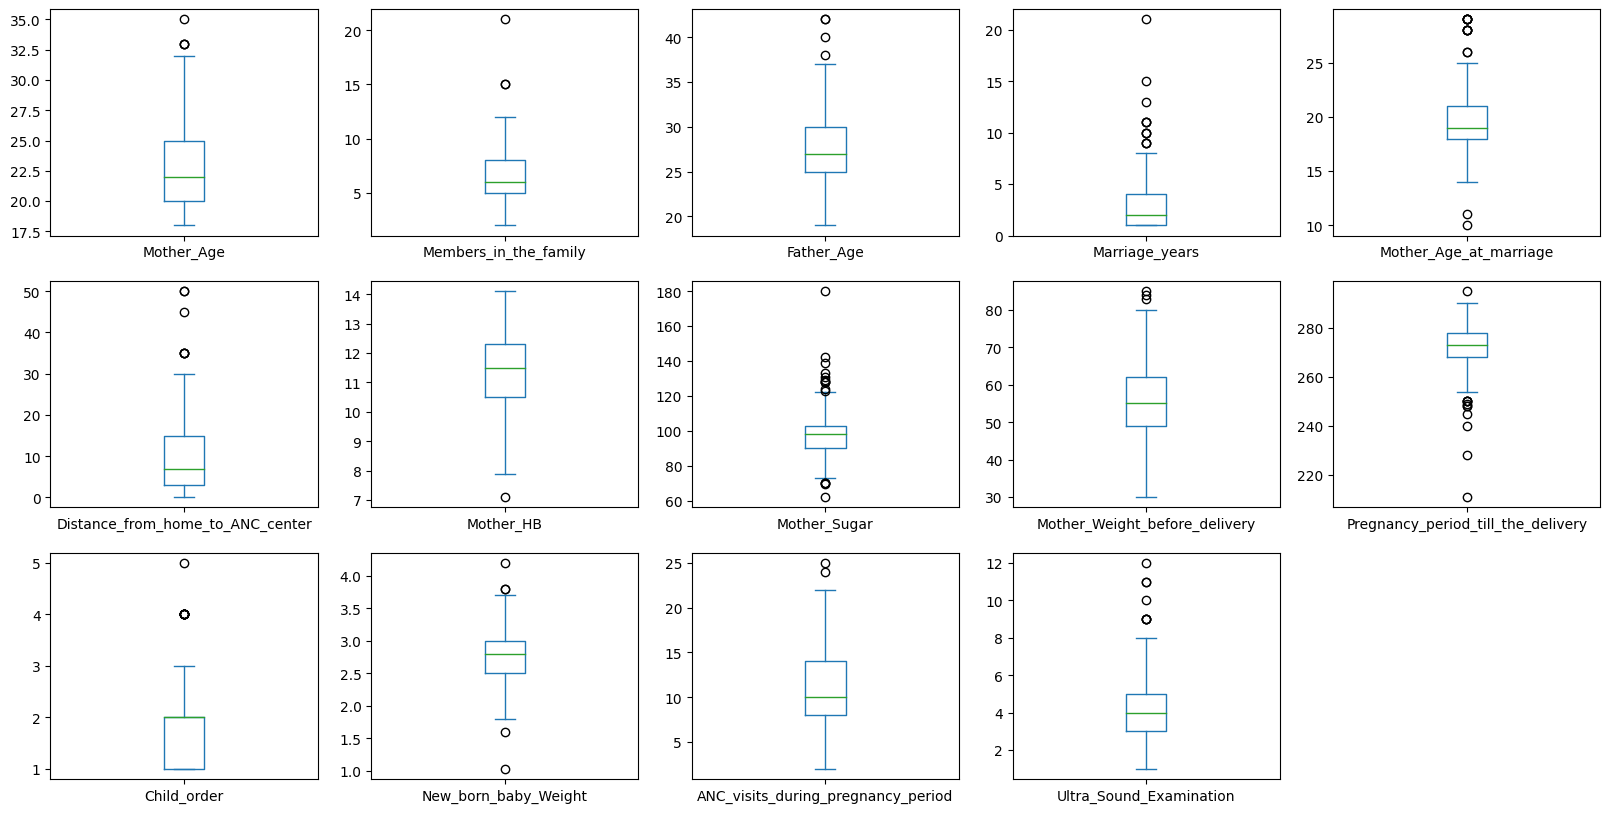

In [11]:
p.plot(kind="box",subplots=True,sharex=False, sharey=False, layout=(3,5), figsize=(20,10) )

Mother_Age                               AxesSubplot(0.125,0.653529;0.133621x0.226471)
Members_in_the_family                 AxesSubplot(0.285345,0.653529;0.133621x0.226471)
Father_Age                             AxesSubplot(0.44569,0.653529;0.133621x0.226471)
Marriage_years                        AxesSubplot(0.606034,0.653529;0.133621x0.226471)
Mother_Age_at_marriage                AxesSubplot(0.766379,0.653529;0.133621x0.226471)
Distance_from_home_to_ANC_center         AxesSubplot(0.125,0.381765;0.133621x0.226471)
Mother_HB                             AxesSubplot(0.285345,0.381765;0.133621x0.226471)
Mother_Sugar                           AxesSubplot(0.44569,0.381765;0.133621x0.226471)
Mother_Weight_before_delivery         AxesSubplot(0.606034,0.381765;0.133621x0.226471)
Pregnancy_period_till_the_delivery    AxesSubplot(0.766379,0.381765;0.133621x0.226471)
Child_order                                  AxesSubplot(0.125,0.11;0.133621x0.226471)
New_born_baby_Weight                      A

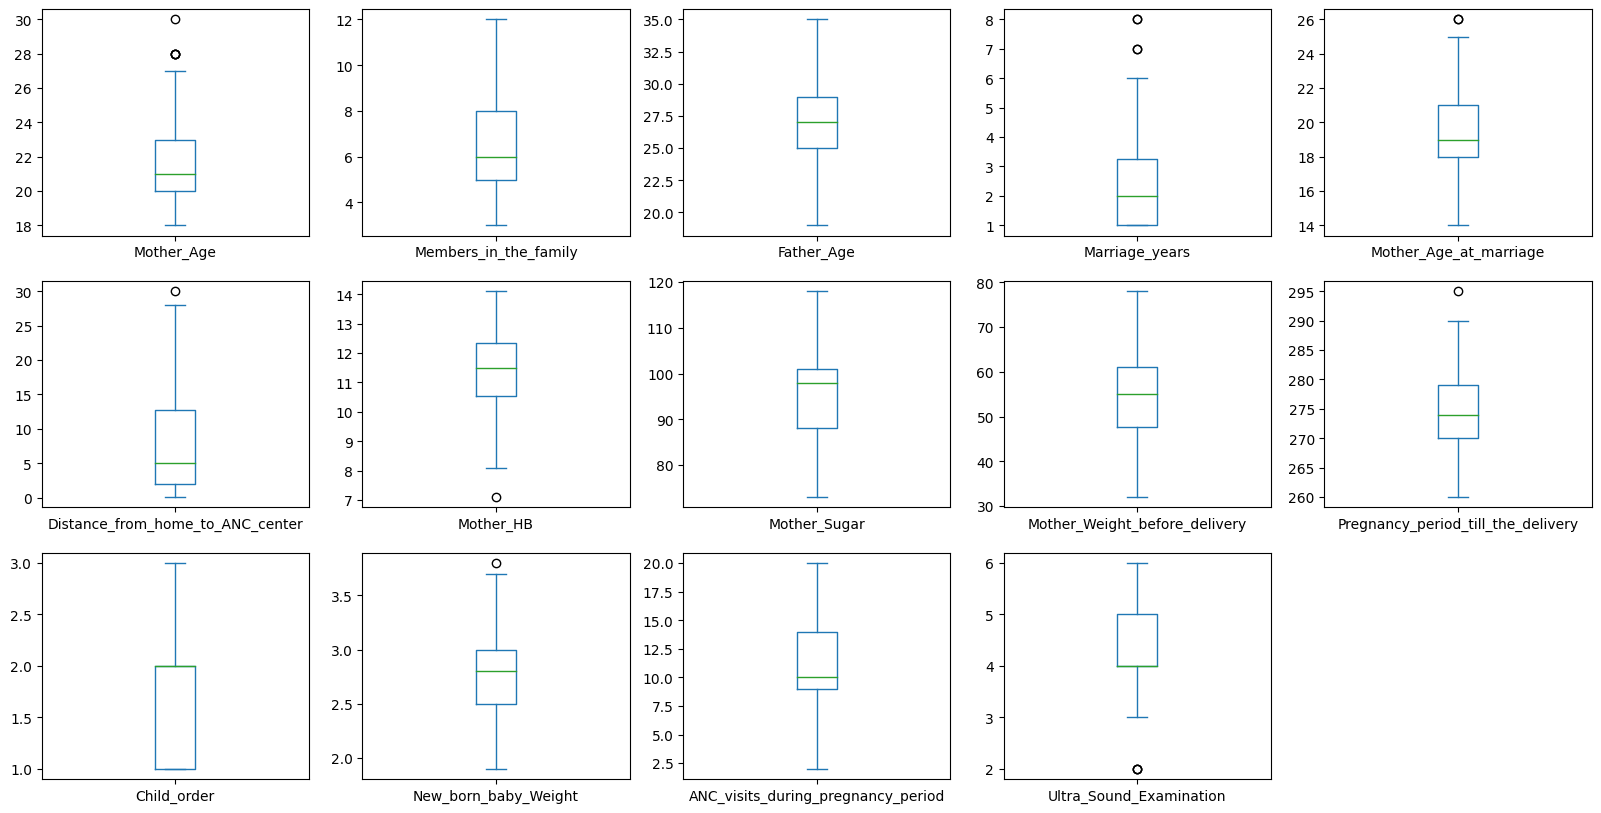

In [12]:
p=p[p.Father_Age < 36]
p=p[p.Marriage_years < 10]
p=p[(p.Mother_Age_at_marriage < 27) & (p.Mother_Age_at_marriage > 12)]
p=p[p.Distance_from_home_to_ANC_center < 35]
p=p[(p.Mother_Sugar < 120) & (p.Mother_Sugar > 70)]
p=p[p.Mother_Weight_before_delivery < 80]
p=p[p.Pregnancy_period_till_the_delivery > 255]
p=p[p.Child_order < 4]
p=p[p.ANC_visits_during_pregnancy_period < 23]
p=p[p.Ultra_Sound_Examination < 7]

p.plot(kind="box",subplots=True,sharex=False, sharey=False, layout=(3,5), figsize=(20,10) )

In [13]:
p.shape

(120, 26)

<span style="Algerian:cursive;font-size:25px;color:red;"> To Check Multicolliearity</span>

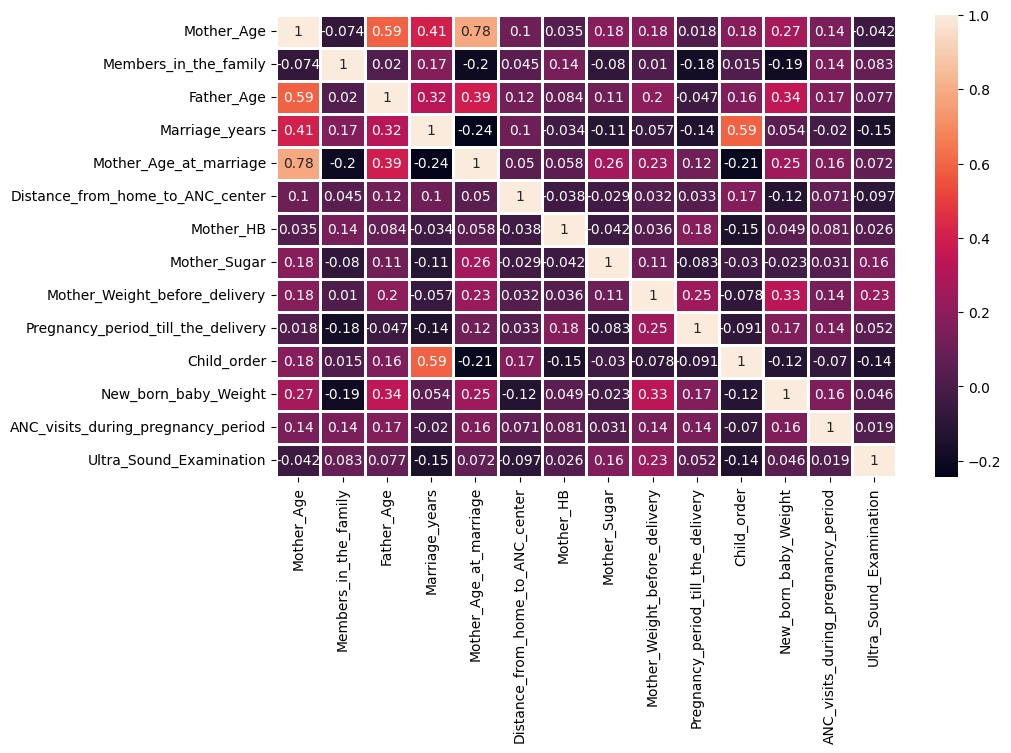

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(p.corr(),annot=True,linewidths=1)
plt.show()

<span style="Algerian:cursive;font-size:25px;color:red;"> Data Visualisation </span>

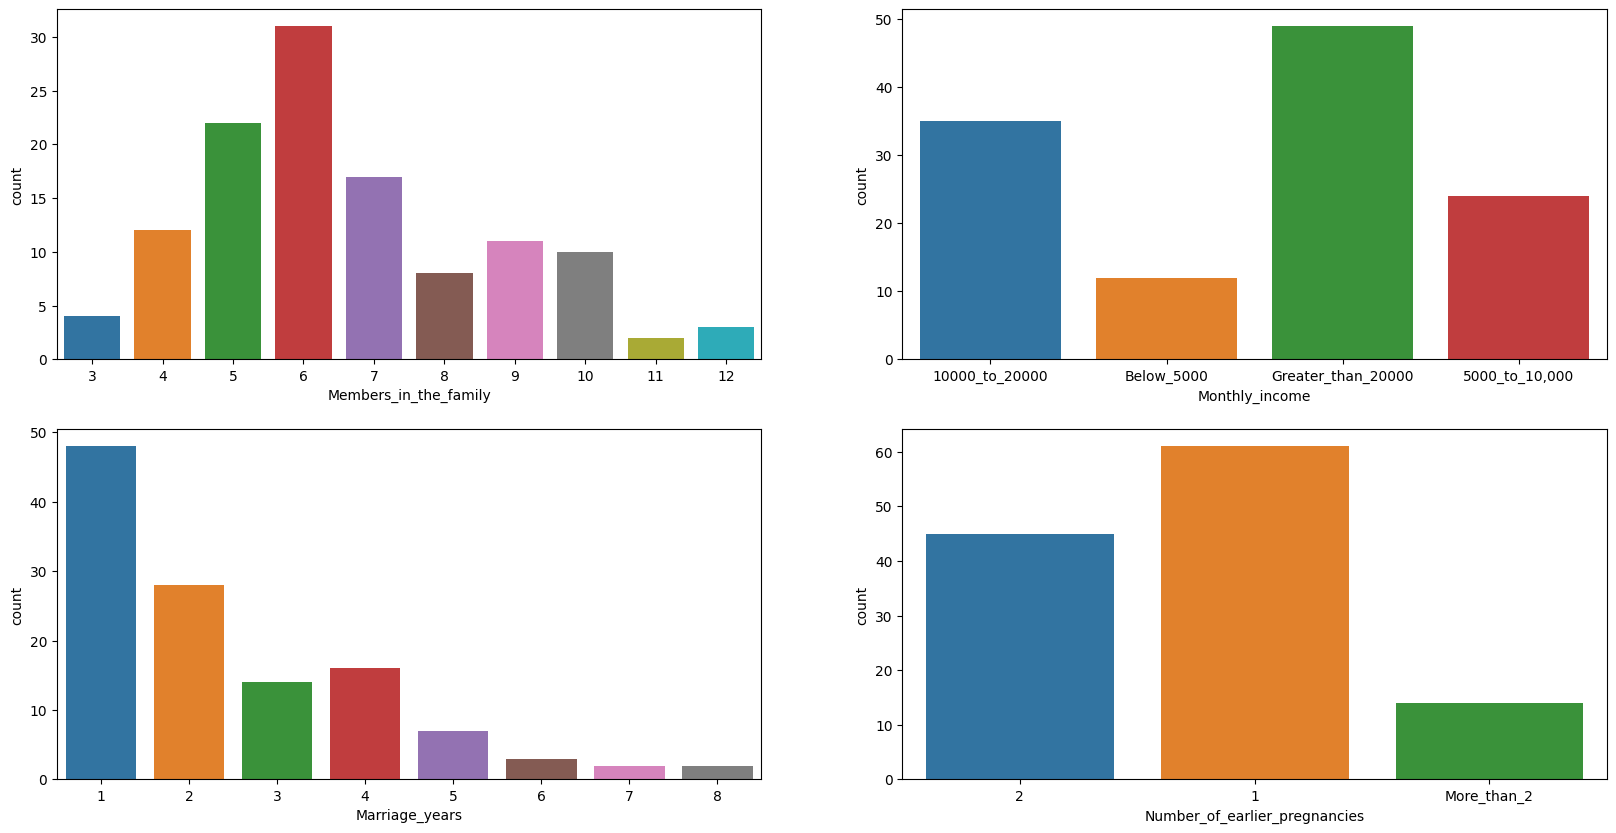

In [15]:
num_col = ["Members_in_the_family","Monthly_income","Marriage_years","Number_of_earlier_pregnancies"]

plt.figure(figsize=(20,10))
for i, col in enumerate(num_col):
    plt.subplot(2,2,i+1)
    sns.countplot(data=p, x=col)

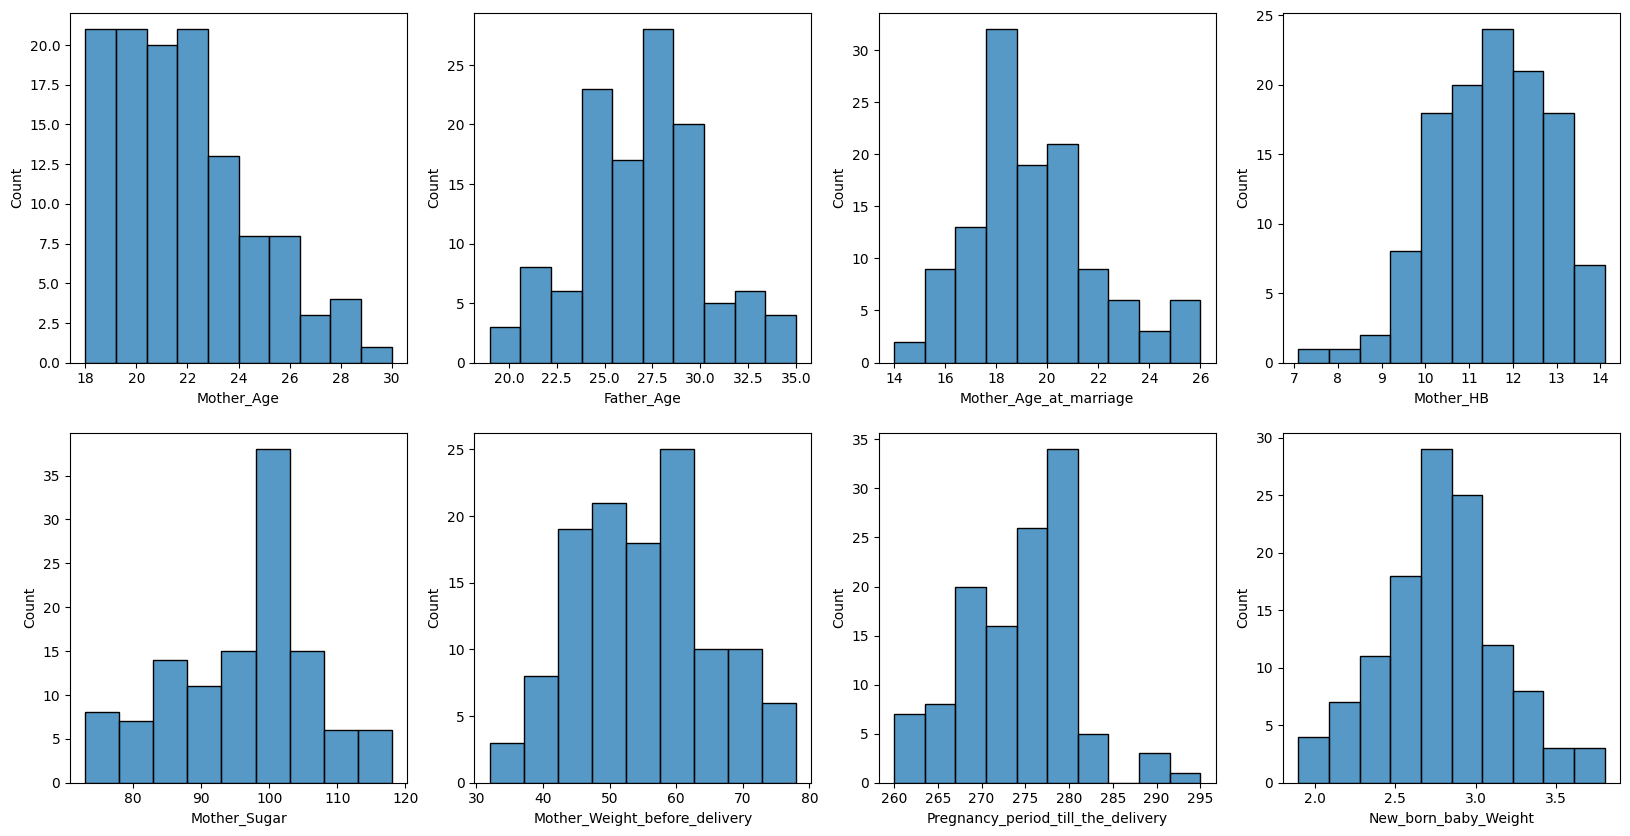

In [16]:
Num_col = ["Mother_Age","Father_Age","Mother_Age_at_marriage","Mother_HB","Mother_Sugar","Mother_Weight_before_delivery","Pregnancy_period_till_the_delivery","New_born_baby_Weight"]

plt.figure(figsize=(20,10))
for i, col in enumerate(Num_col):
    plt.subplot(2,4,i+1)
    sns.histplot(data=p, x=col)

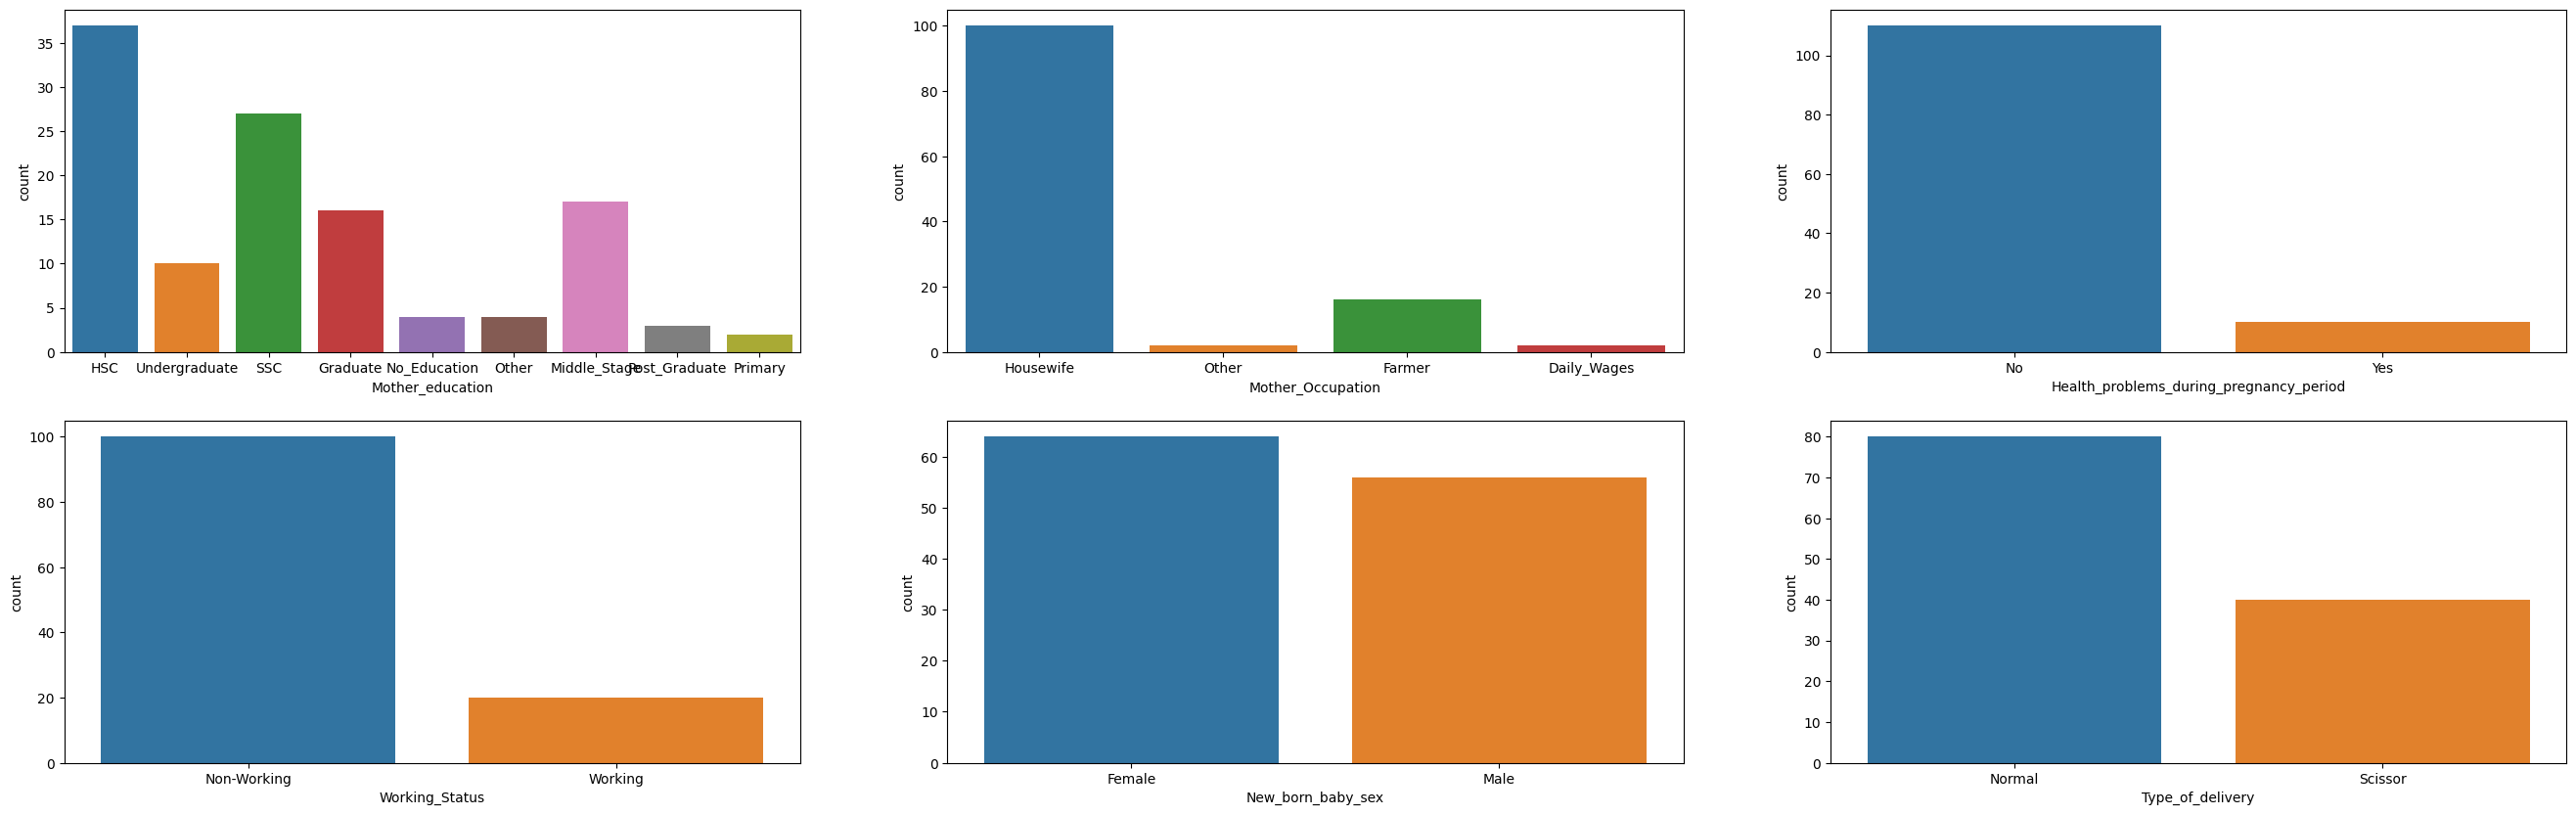

In [17]:
cat_col = ["Mother_education","Mother_Occupation","Health_problems_during_pregnancy_period","Working_Status","New_born_baby_sex","Type_of_delivery"]

plt.figure(figsize=(33,10))
for i, col in enumerate(cat_col):
    plt.subplot(2,3,i+1)  
    sns.countplot(data=p, x=col)
    

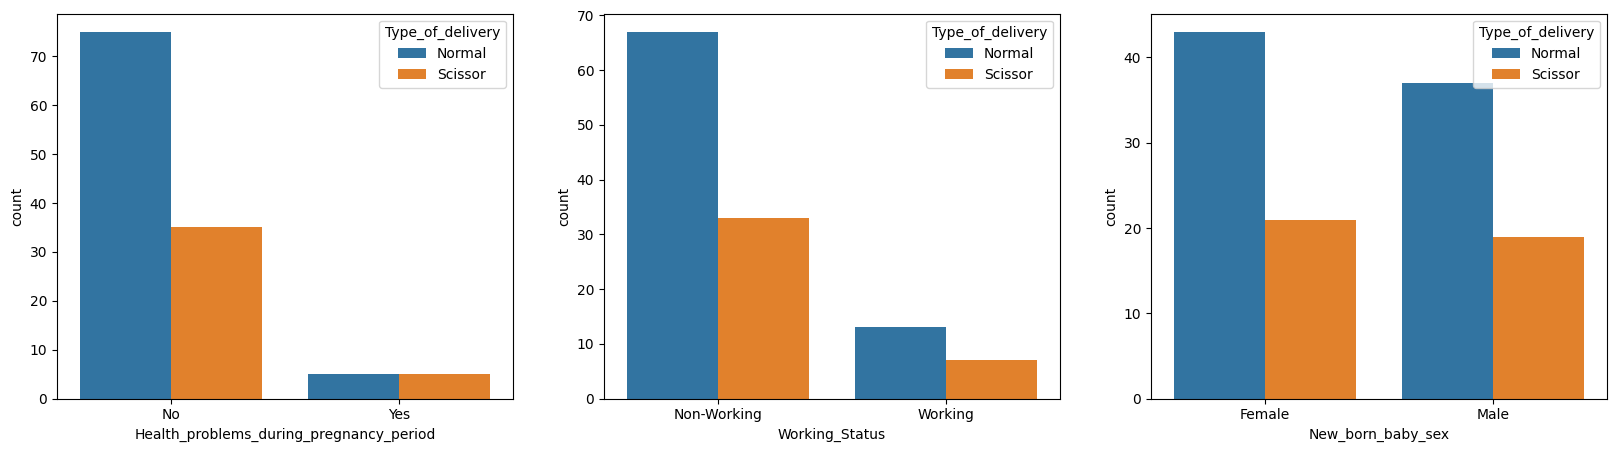

In [18]:
Cat_Col = ["Health_problems_during_pregnancy_period","Working_Status","New_born_baby_sex"]

plt.figure(figsize=(20,5))
for i, col in enumerate(Cat_Col):
    plt.subplot(1,3,i+1)  
    sns.countplot(data=p, x=col, hue='Type_of_delivery')
    

***From above graphs we can observe that Heath Problems During Pregnancy, Working Status and Baby's Sex does not affect the delivery type.***

<AxesSubplot: xlabel='Living_area', ylabel='count'>

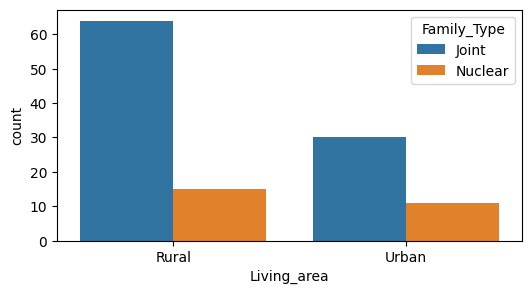

In [19]:
plt.figure(figsize=(6,3))  
sns.countplot(x="Living_area", hue="Family_Type", data=p)

***So here we can observe that most of the rural areas women's belong to joint family.***

<AxesSubplot: xlabel='Health_problems_during_pregnancy_period', ylabel='count'>

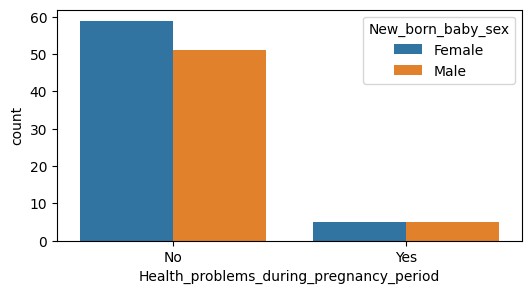

In [20]:
plt.figure(figsize=(6,3))
sns.countplot(x="Health_problems_during_pregnancy_period", hue="New_born_baby_sex", data=p)

***From above graph we can observe that there is no relation between Baby's Sex and Health Problems During Pregnancy.***

In [21]:
print(p.groupby("New_born_baby_sex")["New_born_baby_Weight"].min().reset_index())
print("\n", p.groupby("New_born_baby_sex")["New_born_baby_Weight"].max().reset_index())

  New_born_baby_sex  New_born_baby_Weight
0            Female                   1.9
1              Male                   2.2

   New_born_baby_sex  New_born_baby_Weight
0            Female                   3.5
1              Male                   3.8


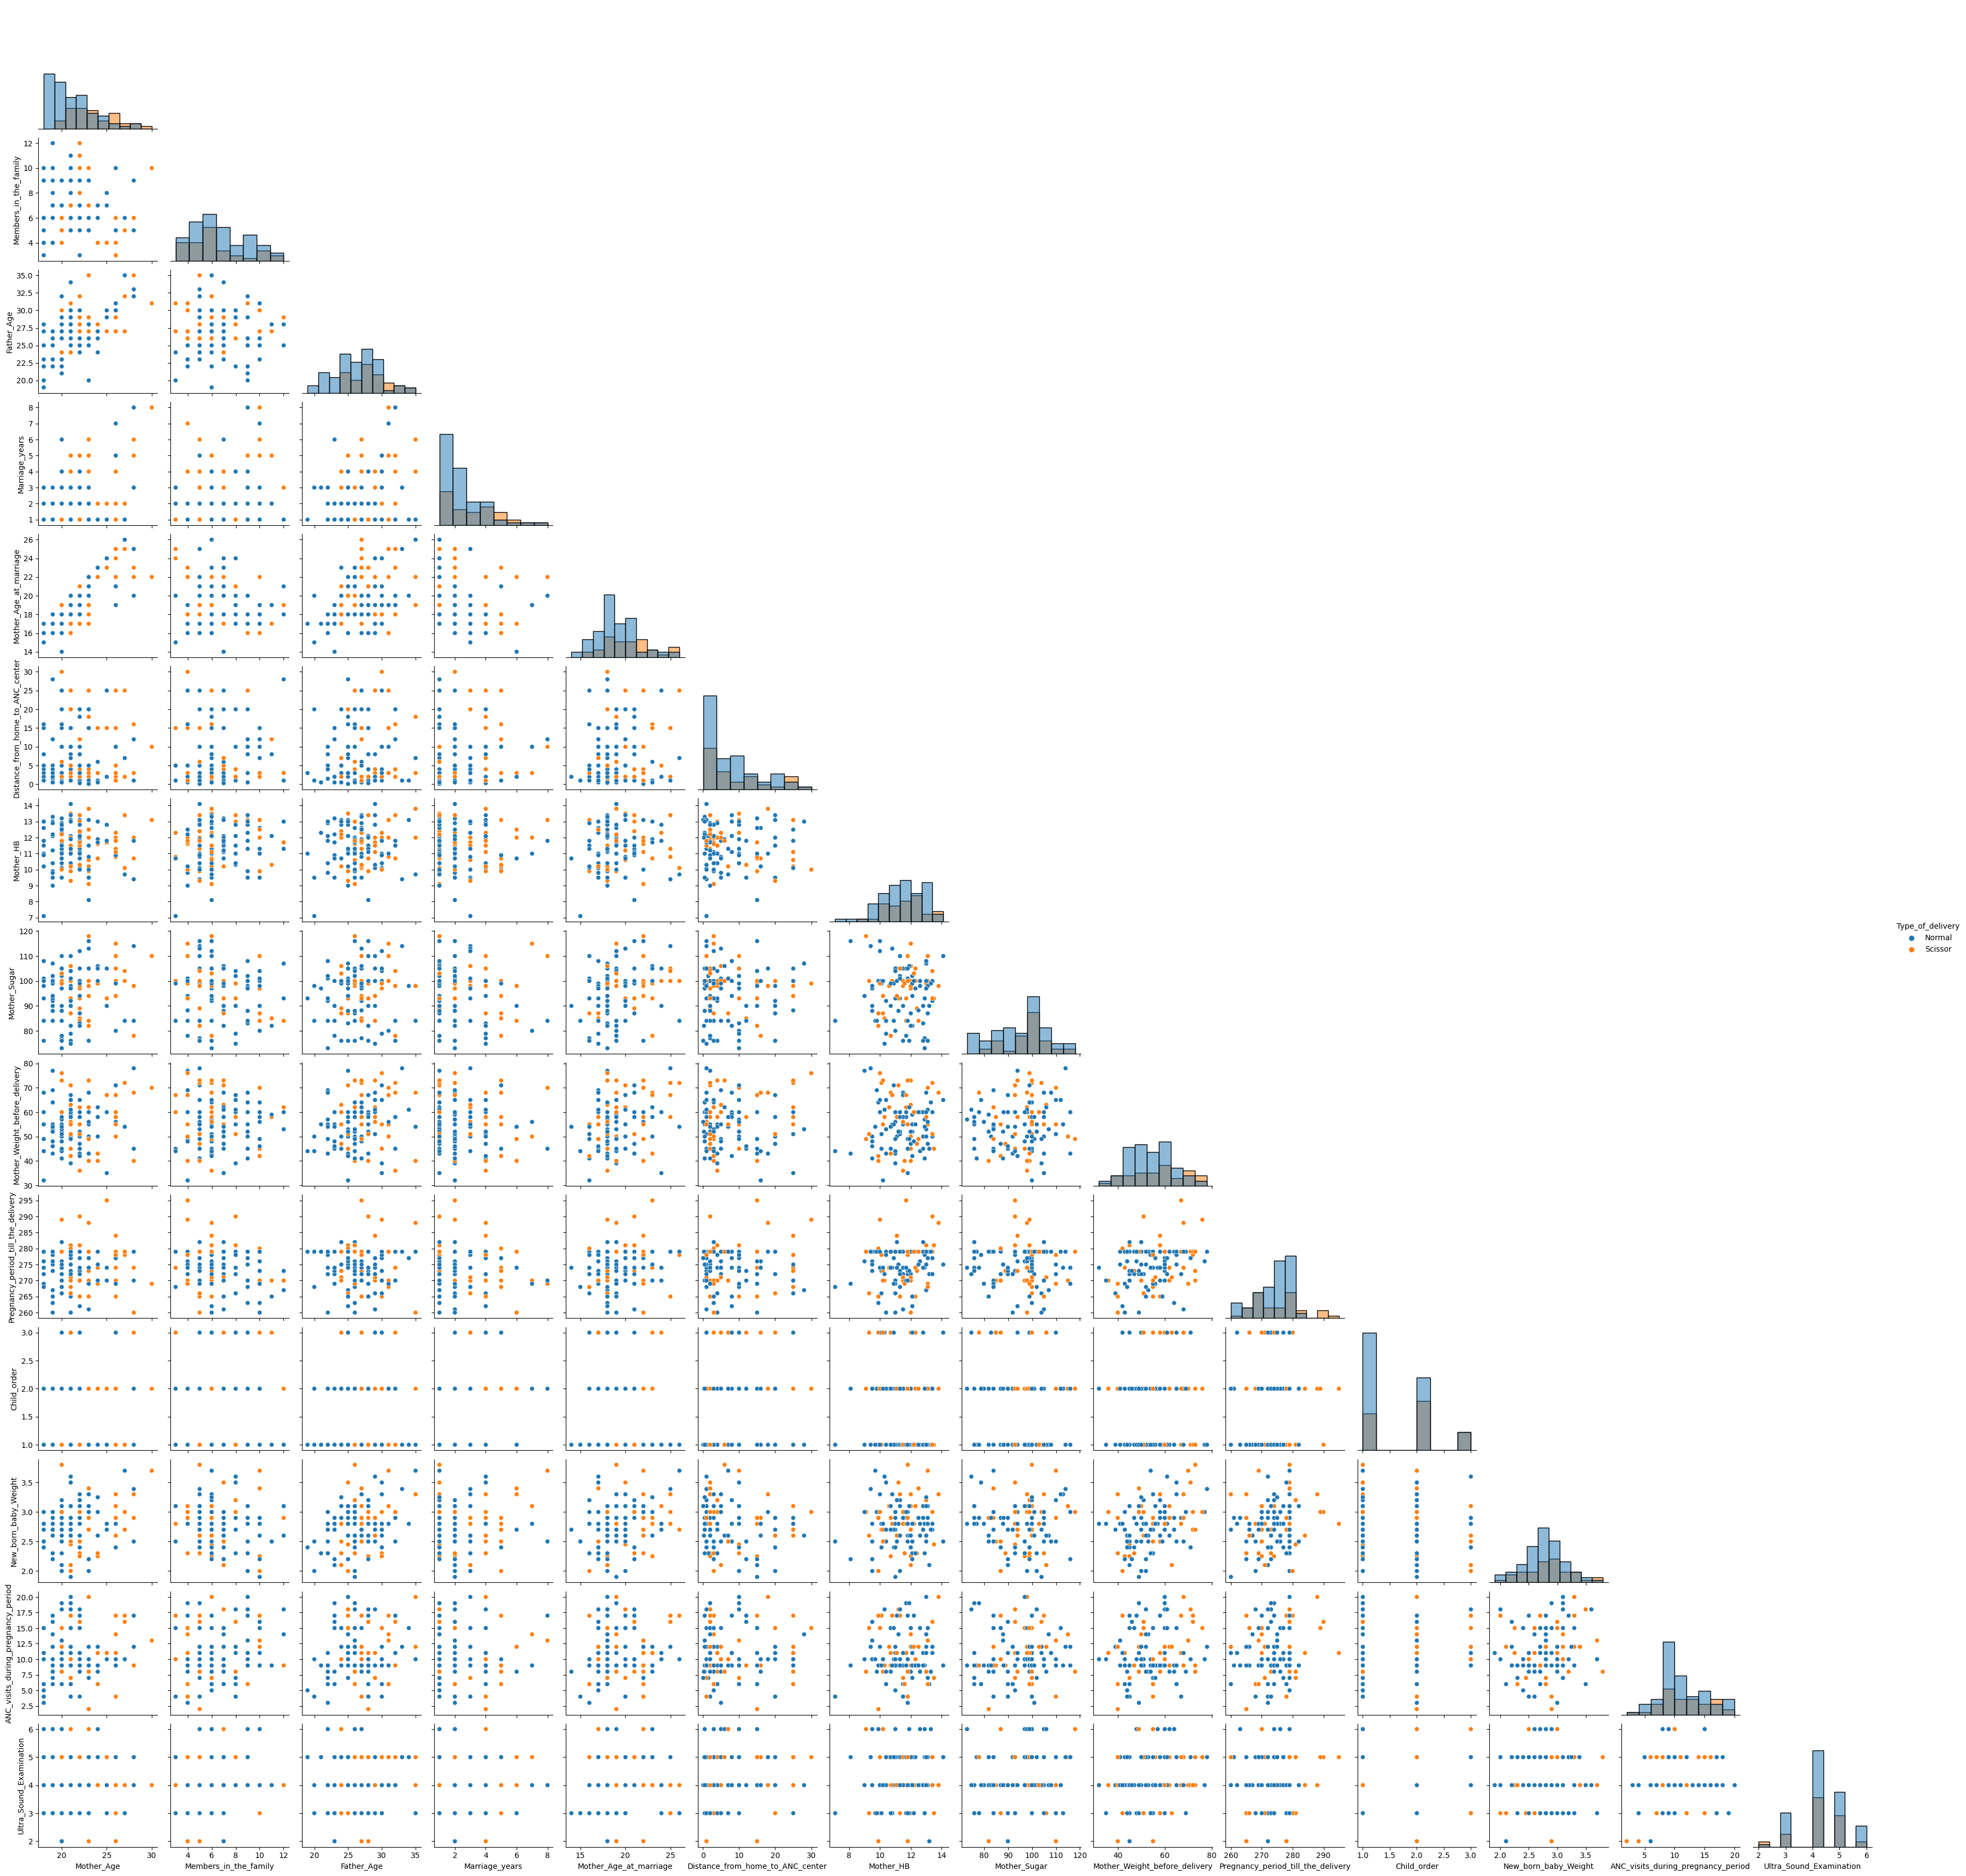

In [22]:
sns.pairplot(p, hue ='Type_of_delivery',diag_kind='hist',corner=True)

In [23]:
#To create a list of character columns
lst=[]
for i in p.columns:
    if p[i].dtype == "O":
        lst.append(i)
    
for col in lst:
    print(col)
    print("Number of unique classes :",p[col].unique())
    print('\n')

Mother_education
Number of unique classes : ['HSC' 'Undergraduate' 'SSC' 'Graduate' 'No_Education' 'Other'
 'Middle_Stage' 'Post_Graduate' 'Primary']


Living_area
Number of unique classes : ['Rural' 'Urban']


Family_Type
Number of unique classes : ['Joint' 'Nuclear']


Monthly_income
Number of unique classes : ['10000_to_20000' 'Below_5000' 'Greater_than_20000' '5000_to_10,000']


Mother_Occupation
Number of unique classes : ['Housewife' 'Other' 'Farmer' 'Daily_Wages']


Working_Status
Number of unique classes : ['Non-Working' 'Working']


Number_of_earlier_pregnancies
Number of unique classes : ['2' '1' 'More_than_2']


Mother_Blood_Group
Number of unique classes : ['A+' 'O+' 'B+' 'AB+' 'B-']


New_born_baby_sex
Number of unique classes : ['Female' 'Male']


Health_problems_during_pregnancy_period
Number of unique classes : ['No' 'Yes']


Any_abnormality_detected_during_USE
Number of unique classes : ['No' 'Yes']


Type_of_delivery
Number of unique classes : ['Normal' 'Scissor']




In [24]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for i in lst:
    p[i]=lb.fit_transform(p[i])

In [25]:
print("Mother_education Unique :",p.Mother_education.unique())
print("Living_area Unique :",p.Living_area.unique())
print("Family_Type Unique :",p.Family_Type.unique())
print("Monthly_income Unique :",p.Monthly_income.unique())
print("Mother_Occupation Unique :",p.Mother_Occupation.unique())
print("Working_Status Unique :",p.Working_Status.unique())
print("Number_of_earlier_pregnancies Unique :",p.Number_of_earlier_pregnancies.unique())
print("Mother_Blood_Group Unique :",p.Mother_Blood_Group.unique())
print("New_born_baby_sex Unique :",p.New_born_baby_sex.unique())
print("Health_problems_during_pregnancy_period Unique :",p.Health_problems_during_pregnancy_period.unique())
print("Any_abnormality_detected_during_USE Unique :",p.Any_abnormality_detected_during_USE.unique())
print("Type_of_delivery Unique :",p.Type_of_delivery.unique())

Mother_education Unique : [1 8 7 0 3 4 2 5 6]
Living_area Unique : [0 1]
Family_Type Unique : [0 1]
Monthly_income Unique : [0 2 3 1]
Mother_Occupation Unique : [2 3 1 0]
Working_Status Unique : [0 1]
Number_of_earlier_pregnancies Unique : [1 0 2]
Mother_Blood_Group Unique : [0 4 2 1 3]
New_born_baby_sex Unique : [0 1]
Health_problems_during_pregnancy_period Unique : [0 1]
Any_abnormality_detected_during_USE Unique : [0 1]
Type_of_delivery Unique : [0 1]


In [26]:
p.head(2)

,Mother_Age,Mother_education,Living_area,Family_Type,Members_in_the_family,Monthly_income,Mother_Occupation,Working_Status,Father_Age,Marriage_years,...,Mother_Weight_before_delivery,Pregnancy_period_till_the_delivery,Child_order,New_born_baby_sex,New_born_baby_Weight,ANC_visits_during_pregnancy_period,Health_problems_during_pregnancy_period,Ultra_Sound_Examination,Any_abnormality_detected_during_USE,Type_of_delivery
0,22,1,0,0,7,0,2,0,24,4,...,47,279,2,0,2.9,15,0,4,0,0
1,22,8,0,0,12,0,2,0,28,1,...,60,273,1,1,3.1,18,1,4,0,0


<span style="Algerian:cursive;font-size:25px;color:red;"> Splittiing Dataset </span>

In [27]:
x=p.drop(columns="Type_of_delivery")
y=p["Type_of_delivery"]                        # 0: Normal     1:Ceasarian

In [28]:
from sklearn.model_selection import train_test_split

,index,Type_of_delivery
0,0,80
1,1,40


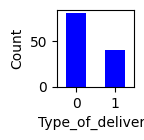

In [29]:
y.value_counts().plot(kind="bar", xlabel="Type_of_delivery", ylabel="Count", color="blue", rot=0, figsize=(1,1))
y.value_counts().reset_index()

***From above bar graph, we can observe that dataset is  unbalanced.***

<span style="Algerian:cursive;font-size:25px;color:red;"> Balancing Data </span>

In [30]:
from collections import Counter
from imblearn.combine import SMOTETomek 
smk=SMOTETomek(random_state=30)
x_smk, y_smk = smk.fit_resample(x,y)
print("Original Dataset Shape : ",Counter(y))
print("Resample Dataset Shape : ",Counter(y_smk))

Original Dataset Shape :  Counter({0: 80, 1: 40})
Resample Dataset Shape :  Counter({0: 78, 1: 78})


<span style="Algerian:cursive;font-size:30px;color:Red;">Model Building</span>

<span style="Algerian:cursive;font-size:25px;color:purple;"> 1. Logistic Regression <span>

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score

In [32]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=i)
    model = LogisticRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

max_iteration=[]
for i in range(0,1000,20):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=random_no)
    model=LogisticRegression(max_iter=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    max_iteration.append(accuracy_score(y_test,y_pred))
    accuracy=max(max_iteration)
print("Maximum iteration Number :",(max_iteration.index(max(max_iteration)))*20, ", Accuracy Score :",accuracy)

Random State Number : 48 , Accuracy Score : 0.7659574468085106
Maximum iteration Number : 160 , Accuracy Score : 0.8085106382978723


In [33]:
x_train, x_test, y_train, y_test=train_test_split(x_smk, y_smk,test_size=0.3,random_state=48)

lr_model = LogisticRegression(max_iter=160)
lr_model.fit(x_train,y_train)
y_pred_lr = lr_model.predict(x_test)
df=pd.DataFrame(y_pred_lr,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred_lr),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred_lr),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred_lr),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred_lr))

Table of Predicted and Actual values :
                   0
Type_of_delivery   
0                 0
0                 1
1                 1
0                 1
0                 0 

 ***********************************************************
Accuracy_score : 0.8085106382978723 

 ***********************************************************
Confusion_matrix : 
 [[18  5]
 [ 4 20]] 

 ***********************************************************
Precision_Score : 
 0.8 

 ***********************************************************
Recall_Score : 
 0.8333333333333334


<span style="Algerian:cursive;font-size:25px;color:purple;"> 2. Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=i)
    model_1 = DecisionTreeClassifier(max_features="sqrt", random_state=15, max_leaf_nodes=8,class_weight="balanced")
    model_1.fit(x_train,y_train)
    y_pred_1 = model_1.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred_1))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

maximum_depth=[]
for k in range(1,15):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=random_no)
    model=DecisionTreeClassifier(max_depth=k,max_features="sqrt", random_state=15, max_leaf_nodes=8,class_weight="balanced")
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    maximum_depth.append(accuracy_score(y_test,y_pred))
    accuracy=max(maximum_depth)
print("Maximum Depth :",(maximum_depth.index(max(maximum_depth))+1), ", Accuracy Score :",accuracy)

Random State Number : 56 , Accuracy Score : 0.8085106382978723
Maximum Depth : 6 , Accuracy Score : 0.8297872340425532


In [36]:
x_train, x_test, y_train, y_test=train_test_split(x_smk, y_smk,test_size=0.3,random_state=56)

dt_model = DecisionTreeClassifier(max_depth=6,max_features="sqrt", random_state=15, max_leaf_nodes=8,class_weight="balanced")
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
                   0
Type_of_delivery   
0                 0
1                 0
0                 0
1                 1
1                 1 

 ***********************************************************
Accuracy_score : 0.8297872340425532 

 ***********************************************************
Confusion_matrix : 
 [[16  7]
 [ 1 23]] 

 ***********************************************************
Precision_Score : 
 0.7666666666666667 

 ***********************************************************
Recall_Score : 
 0.9583333333333334


In [37]:
from sklearn import tree
from sklearn.tree import plot_tree

p["Type_of_delivery"].unique()     

array([0, 1])

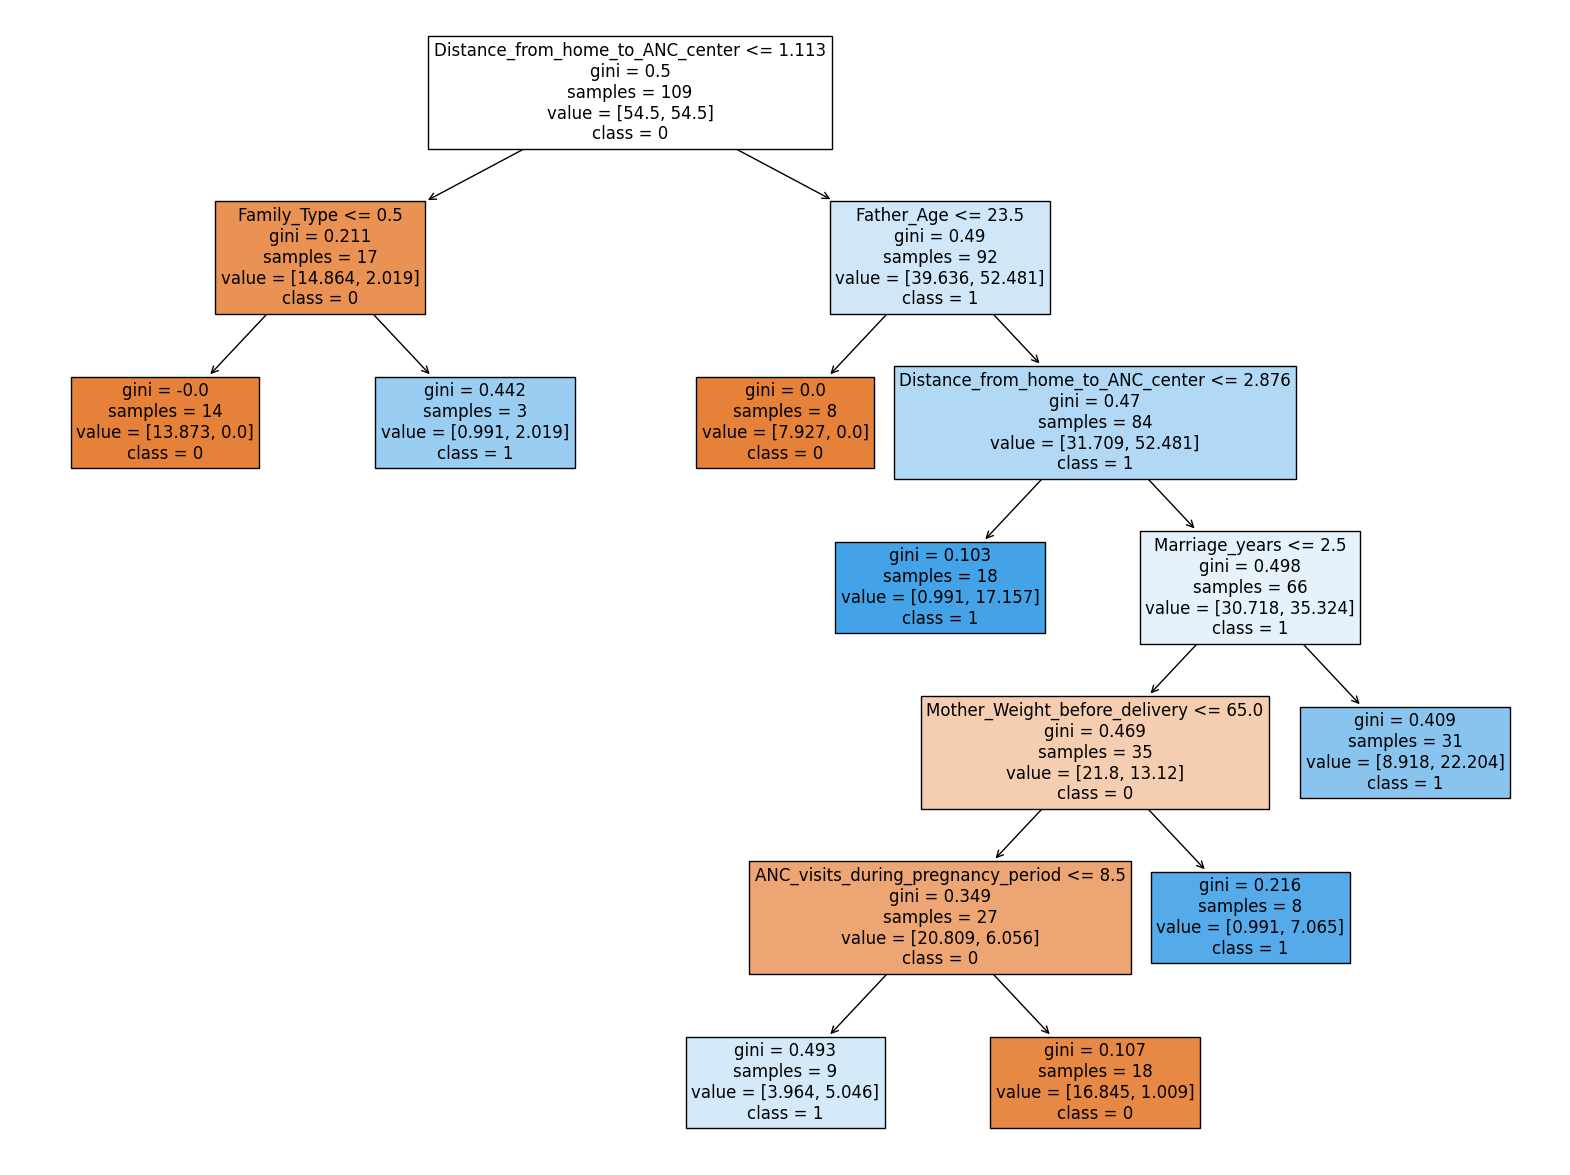

In [38]:
plt.figure(figsize=(20,15))
a=plot_tree(dt_model,fontsize=12,feature_names=x.columns,class_names=["0","1"],filled=True)
plt.show()

<span style="Algerian:cursive;font-size:25px;color:purple;">3. Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=i)
    model_1 = RandomForestClassifier(max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
    model_1.fit(x_train,y_train)
    y_pred_1 = model_1.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred_1))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

maximum_depth=[]
for k in range(2,20):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=random_no)
    model=RandomForestClassifier(max_depth=k,max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    maximum_depth.append(accuracy_score(y_test,y_pred))
    accuracy=max(maximum_depth)
print("Maximum Depth :",(maximum_depth.index(max(maximum_depth))+2), ", Accuracy Score :",accuracy)

Random State Number : 45 , Accuracy Score : 0.8723404255319149
Maximum Depth : 4 , Accuracy Score : 0.8723404255319149


In [41]:
x_train, x_test, y_train, y_test=train_test_split(x_smk, y_smk,test_size=0.30,random_state=45)
rf_model = RandomForestClassifier(max_depth=4,max_leaf_nodes=8,n_jobs=6,random_state=20,class_weight="balanced",max_samples=30)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
                   0
Type_of_delivery   
0                 1
1                 1
1                 1
1                 1
0                 0 

 ***********************************************************
Accuracy_score : 0.8723404255319149 

 ***********************************************************
Confusion_matrix : 
 [[14  4]
 [ 2 27]] 

 ***********************************************************
Precision_Score : 
 0.8709677419354839 

 ***********************************************************
Recall_Score : 
 0.9310344827586207


<span style="Algerian:cursive;font-size:25px;color:purple;"> 4. KNN Algorithm

In [42]:
from sklearn.neighbors import KNeighborsClassifier

Random State Number : 8 , Accuracy Score : 0.7446808510638298
Maximum K_Neighbours : 5 , Accuracy Score : 0.7446808510638298


Text(0.5, 1.0, 'K Neighbours Classifier for different K values')

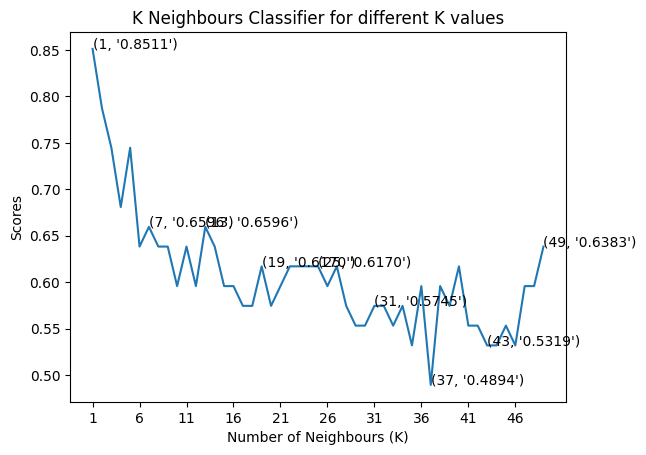

In [43]:
Random_State=[]
for j in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=j)
    knn=KNeighborsClassifier()
    knn.fit(x_train , y_train)
    y_pred = knn.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

K_Neighbours=[]
for k in range(5,50,2):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=random_no)
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    K_Neighbours.append(accuracy_score(y_test,y_pred))
    accuracy=max(K_Neighbours)
print("Maximum K_Neighbours :",(K_Neighbours.index(max(K_Neighbours))*2+5), ", Accuracy Score :",accuracy)

#Graph Code for KNN
knn_scores=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train , y_train)
    y_prediction=knn.predict(x_test)
    knn_scores.append(accuracy_score(y_test,y_prediction))

plt.plot([k for k in range(1,50)],knn_scores)
for i in range(1,50,6):
    plt.text(i,knn_scores[i-1],(i,'%.4f'%knn_scores[i-1]))
plt.xticks([i for i in range(1,50,5)])
plt.xlabel('Number of Neighbours (K)')
plt.ylabel('Scores')
plt.title("K Neighbours Classifier for different K values")

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=8)

knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train , y_train)
y_pred = knn_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
                   0
Type_of_delivery   
1                 1
0                 0
0                 1
1                 0
1                 1 

 ***********************************************************
Accuracy_score : 0.7446808510638298 

 ***********************************************************
Confusion_matrix : 
 [[15  6]
 [ 6 20]] 

 ***********************************************************
Precision_Score : 
 0.7692307692307693 

 ***********************************************************
Recall_Score : 
 0.7692307692307693


<span style="Algerian:cursive;font-size:25px;color:purple;"> 5. Naive Baye's Algorithm

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=i)
    model=GaussianNB()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

Random State Number : 39 , Accuracy Score : 0.8085106382978723


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=39)

nb_model=GaussianNB()
nb_model.fit(x_train , y_train)
y_pred = nb_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
                   0
Type_of_delivery   
1                 1
0                 0
1                 1
0                 0
0                 1 

 ***********************************************************
Accuracy_score : 0.8085106382978723 

 ***********************************************************
Confusion_matrix : 
 [[20  4]
 [ 5 18]] 

 ***********************************************************
Precision_Score : 
 0.8181818181818182 

 ***********************************************************
Recall_Score : 
 0.782608695652174


<span style="Algerian:cursive;font-size:25px;color:purple;"> 6. Support Vector Machine

In [48]:
from sklearn.svm import SVC

In [49]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=i)
    model=SVC()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

Random State Number : 3 , Accuracy Score : 0.48936170212765956


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=3)

svm_model=SVC()
svm_model.fit(x_train , y_train)
y_pred = svm_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
                   0
Type_of_delivery   
1                 0
1                 0
1                 0
1                 0
0                 0 

 ***********************************************************
Accuracy_score : 0.48936170212765956 

 ***********************************************************
Confusion_matrix : 
 [[23  0]
 [24  0]] 

 ***********************************************************
Precision_Score : 
 0.0 

 ***********************************************************
Recall_Score : 
 0.0


<span style="Algerian:cursive;font-size:25px;color:purple;"> 7. Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=i)
    model=GradientBoostingClassifier()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

Random State Number : 3 , Accuracy Score : 0.8723404255319149


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=22)

gb_model=GradientBoostingClassifier()
gb_model.fit(x_train , y_train)
y_pred = gb_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
                   0
Type_of_delivery   
0                 1
0                 1
1                 1
1                 1
1                 1 

 ***********************************************************
Accuracy_score : 0.8723404255319149 

 ***********************************************************
Confusion_matrix : 
 [[17  4]
 [ 2 24]] 

 ***********************************************************
Precision_Score : 
 0.8571428571428571 

 ***********************************************************
Recall_Score : 
 0.9230769230769231


<span style="Algerian:cursive;font-size:25px;color:red;"> Conclusion

In [54]:
data={
    "Algorithms" : ["Logistic Regression", "Decision Tree", "Random Forest Classifier", "KNN Algorithm", "Naive Baye's", "SVM Algorithm", "Gradient Boosting" ],
    "Accuracy" : [0.8085106382978723 , 0.8297872340425532  , 0.8723404255319149 , 0.7446808510638298  , 0.8085106382978723  , 0.48936170212765956 , 0.8723404255319149  ],
    "Precision" : [0.8 , 0.7666666666666667 ,  0.8709677419354839 ,  0.7692307692307693  , 0.8181818181818182 , 0.0 , 0.8571428571428571 ],
    "Recall" : [0.8333333333333334 ,  0.9583333333333334 ,  0.9310344827586207,  0.7692307692307693, 0.782608695652174 , 0.0 , 0.9230769230769231]
}

DF=pd.DataFrame(data)
DF

,Algorithms,Accuracy,Precision,Recall
0,Logistic Regression,0.808511,0.800000,0.833333
1,Decision Tree,0.829787,0.766667,0.958333
2,Random Forest Classifier,0.872340,0.870968,0.931034
3,KNN Algorithm,0.744681,0.769231,0.769231
4,Naive Baye's,0.808511,0.818182,0.782609
5,SVM Algorithm,0.489362,0.000000,0.000000
6,Gradient Boosting,0.872340,0.857143,0.923077


 ***So here, Random Forest Classifier algorithm and Gradient Boosting algorithm gives same and highest Accuracy (87.23%) but Precision and Recall of Random Forest Classifier algorithm is high which is 87.09% and 93.10% resp.***
 
***So we use Random Forest Classifier algorithm for prediction.***

<span style="Algerian:cursive;font-size:35px;color:Blue;">Find Important Features of Random Forest Classifier Algorithm

[0.11567555 0.04148512 0.02093486 0.00247996 0.0602991  0.03020296
 0.01366651 0.00848369 0.04895754 0.03321983 0.07150625 0.01256029
 0.05998229 0.0638305  0.07040838 0.03612977 0.07280953 0.04136251
 0.02428888 0.01092848 0.06015864 0.05306217 0.00257736 0.0406454
 0.00434446]


<AxesSubplot: >

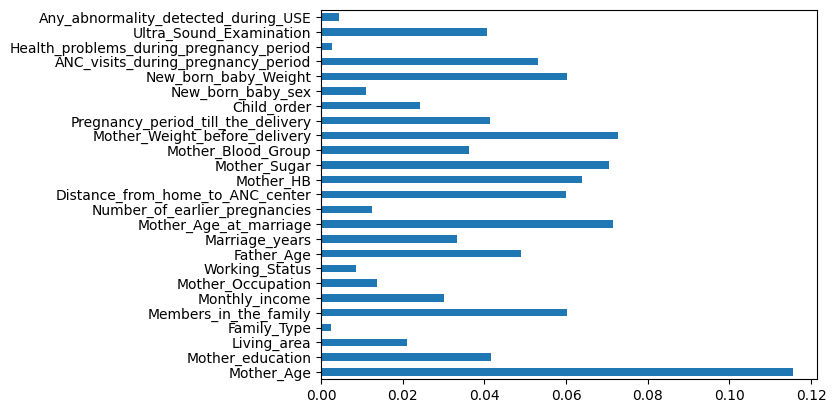

In [55]:
print(rf_model.feature_importances_)
(pd.Series(rf_model.feature_importances_, index=x.columns).plot(kind="barh"))

***From above graph we can observe that Mother_Age, Members_in_the_family, Mother_Age_at_marriage,
Distance_from_home_to_ANC_center, Mother_HB, Mother_Sugar, New_born_baby_Weight, ANC_visits_during_pregnancy_period  are important factors.***

In [56]:
x_pre=p[['Mother_Age','Mother_Age_at_marriage','Distance_from_home_to_ANC_center','Mother_HB','Mother_Sugar','ANC_visits_during_pregnancy_period']]
y=p.Type_of_delivery

In [57]:
x_pre.shape

(120, 6)

,index,Type_of_delivery
0,0,80
1,1,40


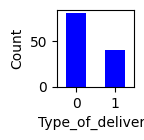

In [58]:
y.value_counts().plot(kind="bar", xlabel="Type_of_delivery", ylabel="Count", color="blue", rot=0, figsize=(1,1))
y.value_counts().reset_index()

In [59]:
#Balancing Data

from collections import Counter
from imblearn.combine import SMOTETomek 
smk=SMOTETomek(random_state=30)
x_smk, y_smk = smk.fit_resample(x_pre,y)
print("Original Dataset Shape : ",Counter(y))
print("Resample Dataset Shape : ",Counter(y_smk))

Original Dataset Shape :  Counter({0: 80, 1: 40})
Resample Dataset Shape :  Counter({0: 75, 1: 75})


In [60]:
Random_State=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=i)
    model_1 = RandomForestClassifier(max_leaf_nodes=8,n_jobs=6,random_state=25,class_weight="balanced",max_samples=30)
    model_1.fit(x_train,y_train)
    y_pred_1 = model_1.predict(x_test)
    Random_State.append(accuracy_score(y_test,y_pred_1))
    random_no=(Random_State.index(max(Random_State)))+1
    accuracy=max(Random_State)
print("Random State Number :",random_no,', Accuracy Score :', accuracy)

maximum_depth=[]
for k in range(2,20):
    x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size=0.30, random_state=random_no)
    model=RandomForestClassifier(max_depth=k,max_leaf_nodes=8,n_jobs=6,random_state=25,class_weight="balanced",max_samples=30)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    maximum_depth.append(accuracy_score(y_test,y_pred))
    accuracy=max(maximum_depth)
print("Maximum Depth :",(maximum_depth.index(max(maximum_depth))+2), ", Accuracy Score :",accuracy)

Random State Number : 71 , Accuracy Score : 0.8888888888888888
Maximum Depth : 7 , Accuracy Score : 0.8888888888888888


In [61]:
x_train, x_test, y_train, y_test=train_test_split(x_smk, y_smk,test_size=0.30,random_state=71)
RF_model = RandomForestClassifier(max_depth=7,max_leaf_nodes=8,n_jobs=6,random_state=25,class_weight="balanced",max_samples=30)
RF_model.fit(x_train,y_train)
y_pred = RF_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n ***********************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n ***********************************************************")
print('Confusion_matrix : \n',confusion_matrix(y_test,y_pred),"\n\n ***********************************************************")
print('Precision_Score : \n',precision_score(y_test,y_pred),"\n\n ***********************************************************")
print('Recall_Score : \n',recall_score(y_test,y_pred))

Table of Predicted and Actual values :
                   0
Type_of_delivery   
1                 1
0                 1
0                 0
1                 1
0                 0 

 ***********************************************************
Accuracy_score : 0.8888888888888888 

 ***********************************************************
Confusion_matrix : 
 [[19  4]
 [ 1 21]] 

 ***********************************************************
Precision_Score : 
 0.84 

 ***********************************************************
Recall_Score : 
 0.9545454545454546


In [62]:
tab=pd.DataFrame()
tab["Delivery_Type"]=y_test
tab["Predected_Value"]=y_pred

d={0:"Normal", 1:"Scissor"}
tab.replace({"Delivery_Type":d,"Predected_Value":d },inplace=True)
tab

,Delivery_Type,Predected_Value
132,Scissor,Scissor
46,Normal,Scissor
53,Normal,Normal
126,Scissor,Scissor
59,Normal,Normal
71,Scissor,Scissor
4,Normal,Normal
117,Scissor,Scissor
135,Scissor,Scissor
77,Normal,Normal


<span style="Algerian:cursive;font-size:35px;color:SkyBlue;">SAVE THE MODEL

In [64]:
import pickle
filename = "C:\\Users\\LENOVO\\Kalyani\\Documents\\Datasets\\Save_Pregnancy_Model.sav"
pickle.dump(RF_model,open(filename,"wb"))

<span style="Algerian:cursive;font-size:35px;color:SkyBlue;">Load the Model

In [1]:
import pickle
load_model = pickle.load(open("C:\\Users\\LENOVO\\Kalyani\\Documents\\Datasets\\Save_Pregnancy_Model.sav","rb"))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Mother_Age =float(input("\n Age of the Mother [in years]: "))
Mother_Age_at_marriage =int(input("\n Mother Age at Marriage [in years]: "))
Distance_from_home_to_ANC_center =float(input("\n Distance from home to ANC center [in km]: "))
Mother_HB =float(input("\n Mother HB [in g/dl (grams per deciliter)]: "))
Mother_Sugar =float(input("\n Mother Sugar [in mg/dL]: "))
ANC_visits_during_pregnancy_period =float(input("\n ANC visits during pregnancy period: "))

m=load_model.predict([[Mother_Age,Mother_Age_at_marriage,Distance_from_home_to_ANC_center,Mother_HB,Mother_Sugar,ANC_visits_during_pregnancy_period]])
if(m==0):
    print("\n\n                    ✨🎉 Your Delivery Type will be Normal😊 ")
else:
    print("\n\n                      Your Delivery Type will be Ceasarian😔 ")


 Age of the Mother [in years]: 20


In [86]:
x_test.head()

,Mother_Age,Mother_Age_at_marriage,Distance_from_home_to_ANC_center,Mother_HB,Mother_Sugar,ANC_visits_during_pregnancy_period
132,20,18,4.813495,11.72881,100.000000,7
46,20,16,25.000000,10.10000,100.000000,9
53,23,21,15.000000,8.10000,116.000000,9
126,24,21,1.826205,11.84131,109.173795,5
59,19,18,2.000000,11.20000,88.000000,14


In [88]:
y_test.head().reset_index()

,index,Type_of_delivery
0,132,1
1,46,0
2,53,0
3,126,1
4,59,0
